In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city

# Enigme 2: Les quatre chevelures
Les chevelures des 4 personnages sont colorées en orange ou bleu de manière aleatoire et indépendante. Votre joueur ne peut observer que la couleur de cheveux des trois autres personnages. Chaque joueur ne peut communiquer que par un mot. Comment faire pour que chacun devine sa couleur ?

# Creation d'un registre quantique de 8 Qubits

In [2]:
q = QuantumRegister(8)

# Creation d'un Circuit quantique utilisant le registre Q et C

In [3]:
circ = QuantumCircuit(q)

# Etat0

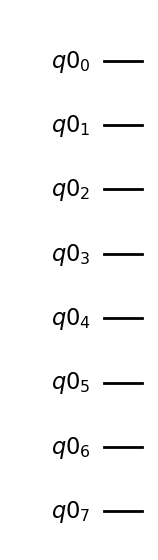

In [4]:
circ.draw('mpl')

# Systeme en place

In [5]:
for i in range(0, 4):
    circ.h(i)

# Etat1 : Les joueurs sont en place
-   Les 4 premières correspondent aux valeurs probables des couleurs de cheveux
-   Les 4 dernières correspondent aux valeurs prédites des couleurs de cheveux
Les valeurs de qubit de 0 à 3 sont inconues donc on les met en superposition avec une porte Hadamard

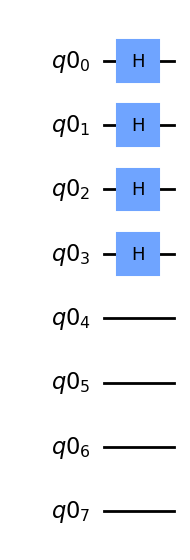

In [6]:
circ.draw('mpl')

In [7]:
circ.barrier()

# Etat2

In [8]:
for i in [1, 2, 3]:
    circ.cx(q[i], q[4])

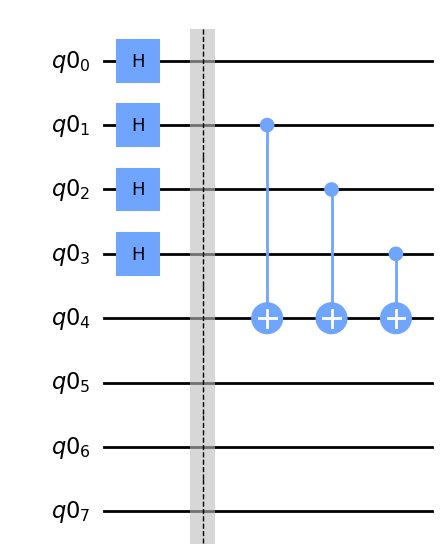

In [9]:
circ.draw('mpl')

 Le qb 4 correspond à ce qu'observe votre joueur. Il faut lier les qbs 1 à 3 avec le qb 4 avec des portes CNOT

In [10]:
circ.barrier()

# Etat3

In [11]:
for i in [5, 6, 7]:
    circ.cx(q[4], q[i])

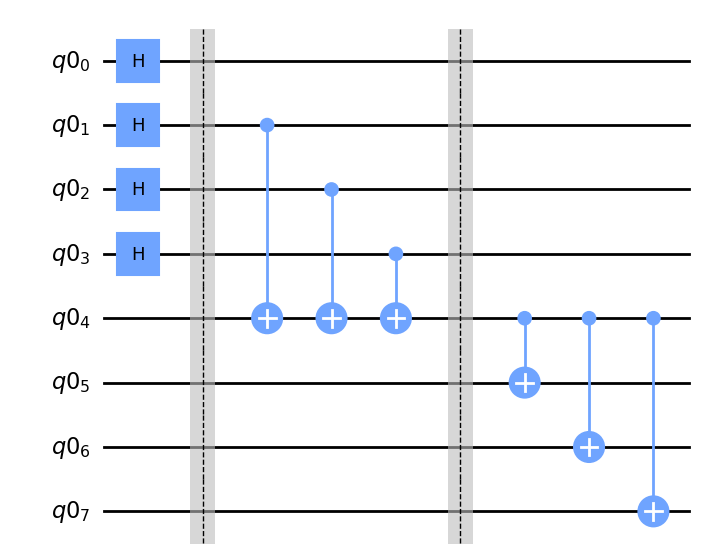

In [12]:
circ.draw('mpl')

Le premier joueur parle et les autres connaissent la réponse du premier. On lie le qb 4 avec les qbs 5, 6 et 7

In [13]:
circ.barrier()

# Etat 4

In [14]:
circ.cx(2,5)

In [15]:
circ.cx(3,5)

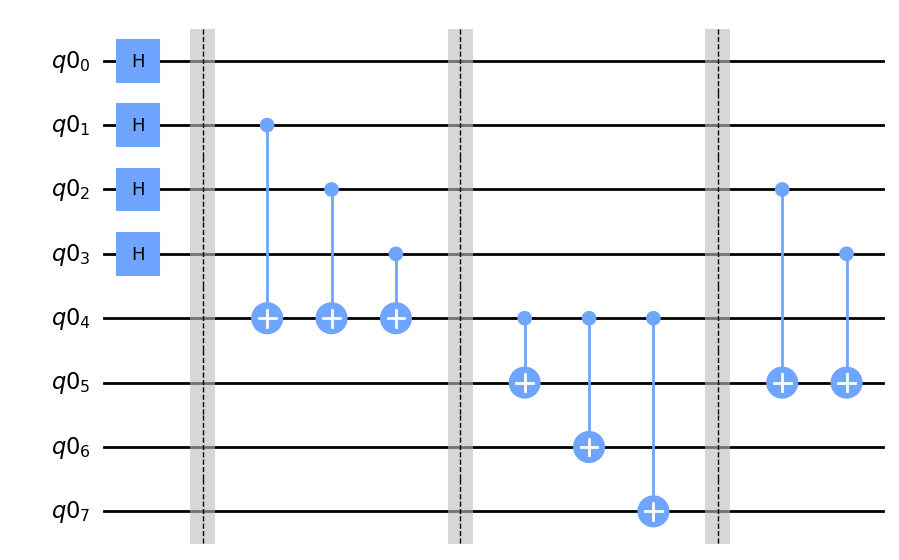

In [16]:
circ.draw('mpl')

Puis le deuxième joueur va observer les couleurs de cheveux. On lie 5 avec les qb 2 et 3

In [17]:
circ.barrier()

# Etat 5

In [18]:
circ.cx(5,6)

In [19]:
circ.cx(5,7)

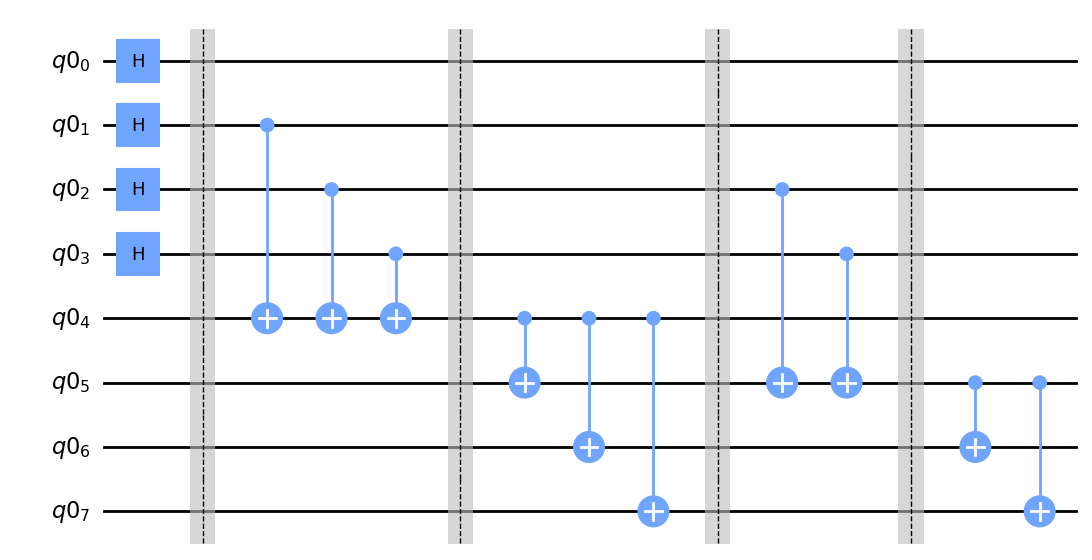

In [20]:
circ.draw('mpl')

Joueur 3 et 4 ont connaissance de la couleur du joueur 2. On intrique le qb 5 avec les qbs 6 et 7

# Etat 6

In [21]:
circ.barrier()

In [22]:
circ.cx(3,6)

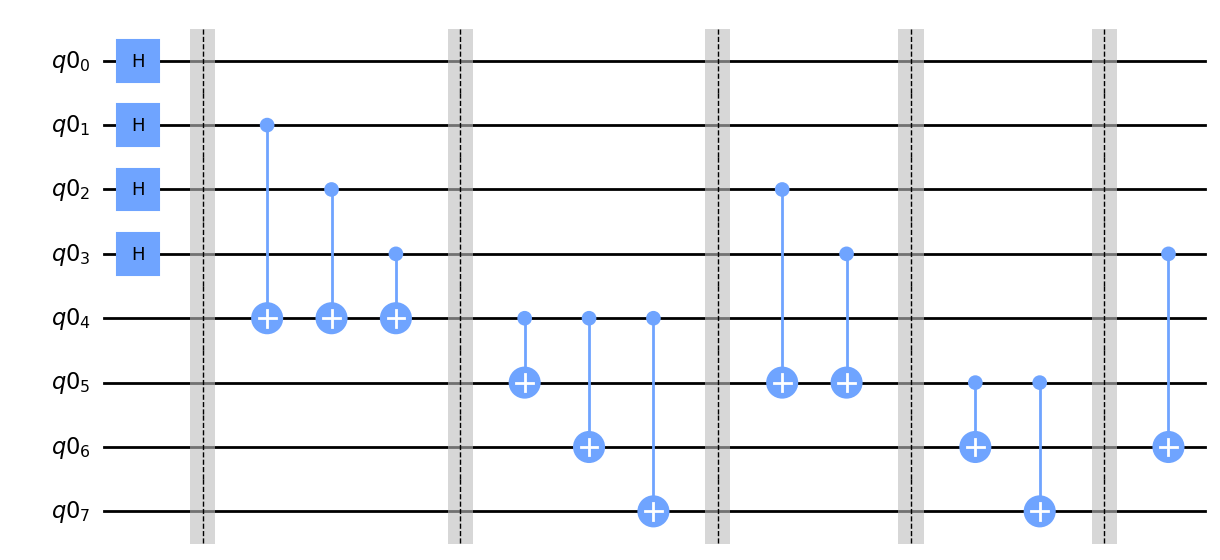

In [23]:
circ.draw('mpl')

Joueur 4 aura la connaissance de la couleur de joueur 3.

In [24]:
circ.barrier()

# Etat 7

In [25]:
circ.cx(6,7)

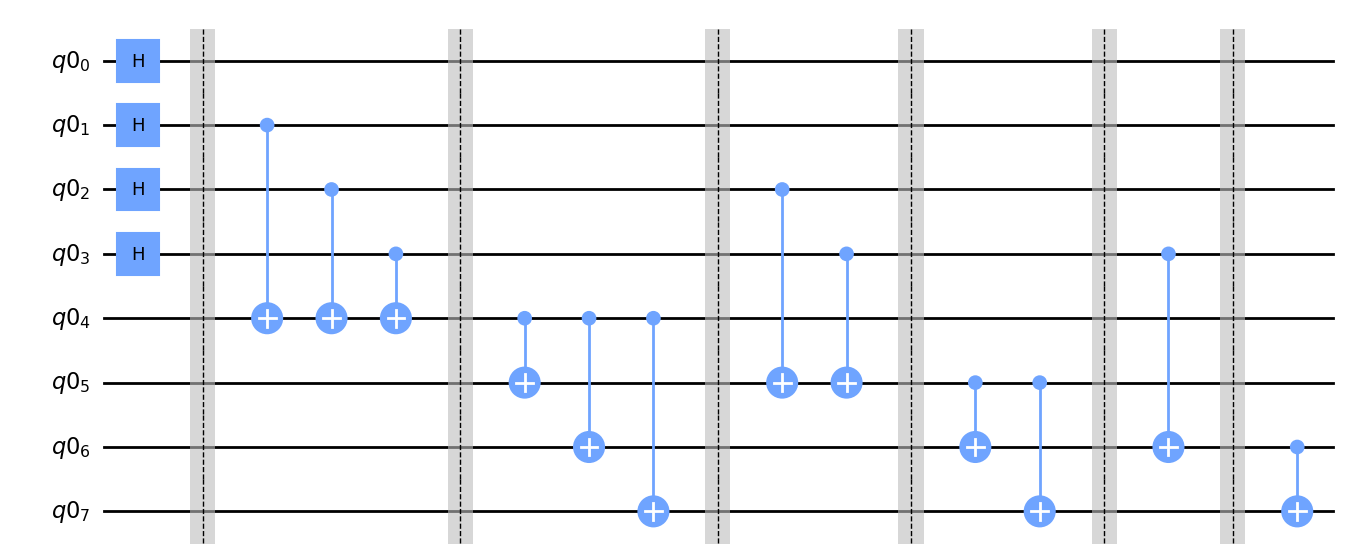

In [26]:
circ.draw('mpl')

On intrique qb 6 et 7.

In [27]:
circ.barrier()

# Mesures

In [28]:
circ.measure_all()

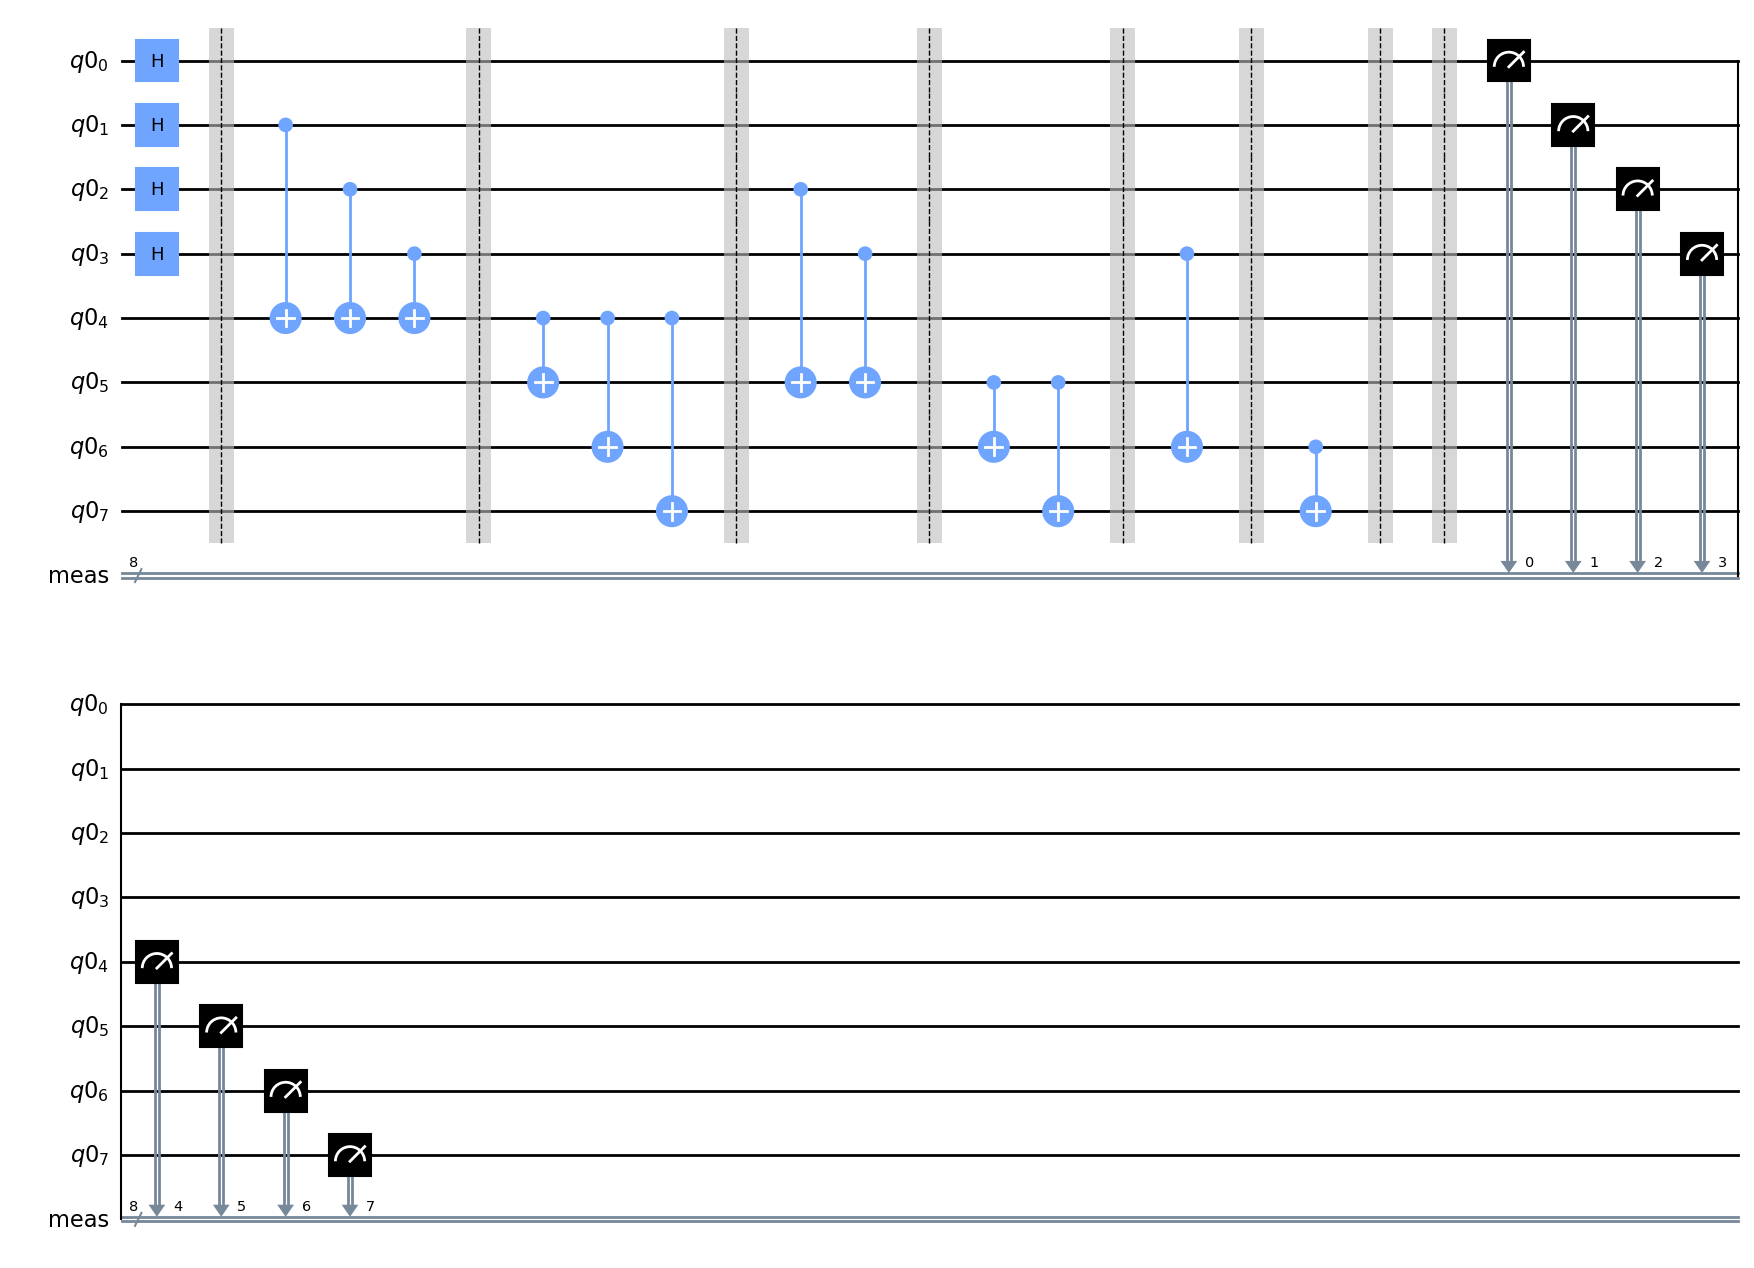

In [29]:
éduccirc.draw('mpl')

Essayons d'établir le taux de succès de notre méthode

In [30]:
# backend = Aer.get_backend('statevector_simulator')
# job = backend.run(circ, shots=10000)
# res = job.result()
# outputstate = res.get_statevector(circ, decimals=3)

In [31]:
# plot_histogram(result.get_counts(circ))

In [32]:
# plot_bloch_multivector(outputstate)